Fontconfig warning: "/usr/share/fontconfig/conf.avail/05-reset-dirs-sample.conf", line 6: unknown element "reset-dirs"


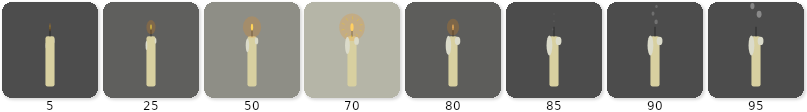

interactive(children=(FloatSlider(value=50.0, description='x'), Output()), _dom_classes=('widget-interact',))

In [1]:
import mglyph as mg
import numpy as np

""" My glyph library """

def empty_glyph(x: float, canvas: mg.Canvas) -> None:
    pass


def hatching_chick(x: float, canvas: mg.Canvas) -> None:
    pass

def candle_glyph(x: float, canvas: mg.Canvas) -> None:
    # svicka
    bg_color = mg.ColorMap({0: "#4C4C4C", 100: "#D0D0BF"})

    bgx = x
    if x > 70:
        t = (x - 70) / 15 * 100
        bgx = mg.lerp(t, 70.0, 0.0)

    canvas.circle((0, 0), 5, style='fill', color=bg_color.get_color(bgx))

    canvas.rounded_rect((-0.1, -0.3), (0.1, 0.8), 0.05, 0.05, 0.05, 0.05, style='fill', color="#D8D0A0")

    # knot
    canvas.line((0, -0.5), (0, -0.3), width='10p', color='black', linecap='round')
    
    # plamen, bude menit velikost a barvu, bude mit dve casti - vnitrni a vnejsi, vnejsi se objevi pozdeji
    if x <= 70: # plamen se zvetsuje
        f = mg.lerp(x, 0.0, 100.0)
    elif x <= 85: # plamen se zmensuje
        t = (x - 70) / 15 * 100
        f = mg.lerp(t, 100.0, 0.0)
    else: # plamen neni
        f = 0.0

    #vnitrni plamen
    canvas.ellipse((0, -0.5), mg.lerp(f, 0.0, 0.1), mg.lerp(f, 0.1, 0.2), style='fill', color=mg.ColorMap({0: "#FFFF47", 70: "#FFE07A", 85: "#E3AD70"}).get_color(x))
    #vnejsi plamen
    canvas.ellipse((0, -0.5), mg.lerp(f, 0.0, 0.8), mg.lerp(f, 0.15, 0.8), style='fill', color=(1, 0.55, 0, 0.2))
    
    wax_x = x
    if wax_x > 85:
        wax_x = 85

    canvas.ellipse((0.1, -0.2), mg.lerp(wax_x, 0.0, 0.15), mg.lerp(wax_x, 0.1, 0.2), style='fill', color="#DBDBCA")
    canvas.ellipse((-0.1, -0.1), mg.lerp(wax_x, 0.0, 0.15), mg.lerp(wax_x, 0.1, 0.5), style='fill', color="#DBDBCA")
    
    if x >= 85:
        s = (x - 85) / 15 * 100 
        if s > 100:
            s = 100

        y0 = mg.lerp(s, -0.45, -0.95)

        a = mg.lerp(s, 0.10, 0.60)

        wobble = 0.05 * np.sin(x * 0.35)

        c1 = (0.85, 0.85, 0.85, a)
        c2 = (0.90, 0.90, 0.90, a * 0.85)
        c3 = (0.95, 0.95, 0.95, a * 0.70)

        canvas.ellipse((0.02 + wobble, y0), mg.lerp(s, 0.04, 0.14), mg.lerp(s, 0.05, 0.20), style='fill', color=c1)

        canvas.ellipse((-0.04 - wobble * 0.8, y0 - 0.18), mg.lerp(s, 0.035, 0.12), mg.lerp(s, 0.045, 0.18), style='fill', color=c2)

        canvas.ellipse((0.03 + wobble * 0.6, y0 - 0.34), mg.lerp(s, 0.03, 0.10), mg.lerp(s, 0.04, 0.15), style='fill', color=c3)

    # paprsky u plaminku
    if f > 60:
        b = (f - 60) / 40
        if b > 1:
            b = 1

        n_rays = int(8 + 10 * b)         
        r0 = 0.18                         
        r1 = 0.18 + 0.20 * b              
        ray_w = f"{int(4 + 10 * b)}p"     

        phase = x * 0.08

        for i in range(n_rays):
            ang = phase + i * 2*np.pi / n_rays
            p0 = mg.orbit((0, -0.5), ang, r0)
            p1 = mg.orbit((0, -0.5), ang, r1)
            canvas.line(p0, p1, width=ray_w, color='gold', linecap='round')


mg.show(candle_glyph, x=[5, 25, 50, 70, 80, 85, 90, 95])
mg.interact(candle_glyph)



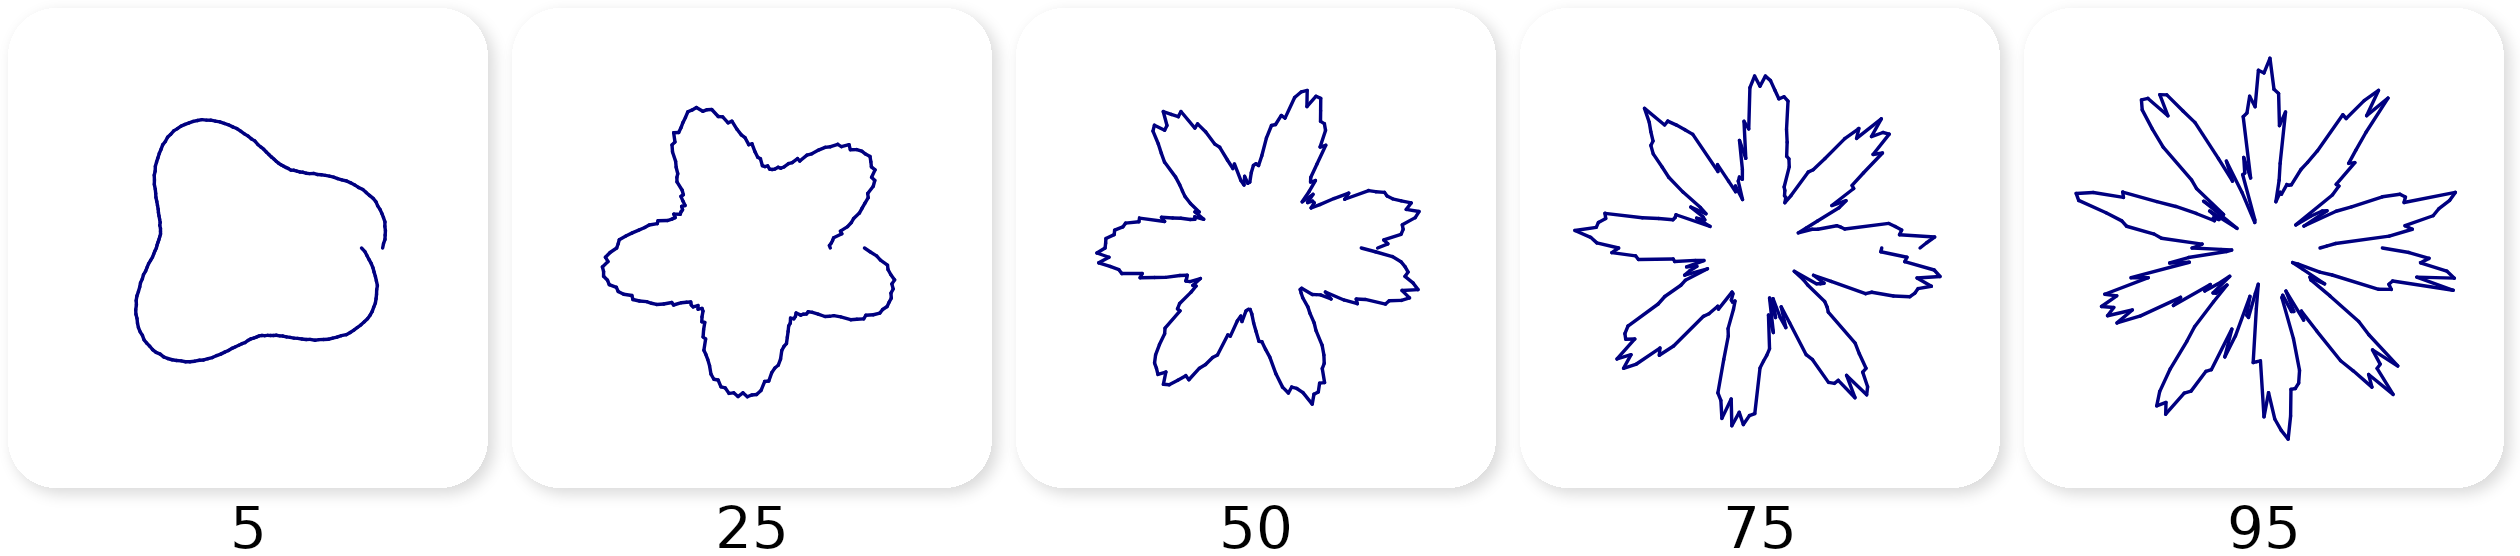

interactive(children=(FloatSlider(value=50.0, description='x'), Output()), _dom_classes=('widget-interact',))

In [68]:
import mglyph as mg
import numpy as np
import random

# Grace Otuya

def ripple_wave_glyph(x: float, canvas: mg.Canvas) -> None:
    frequency = mg.lerp(x, 3, 10)      # How many ripple waves
    amplitude = mg.lerp(x, 0.1, 0.3)   # How big the waves are
    deformity = mg.lerp(x, 0.0, 0.4)   # How uneven the wave is

    points = []
    steps = 200      # How smooth the circle is
    for i in range(steps + 1):
        angle = (2 * np.pi) * (i / steps)
        base_radius = 0.5 + amplitude * np.sin(frequency * angle)

        # Add random deformity
        random_shift = (random.uniform(-1, 1) * deformity)
        radius = base_radius + random_shift * amplitude
        points.append((radius * np.cos(angle), radius * np.sin(angle)))

    # Draw the ripple wave shape
    for idx in range(len(points) - 1):
        canvas.line(points[idx], points[idx + 1], color='navy', width='15p', linecap='round')

mg.show(ripple_wave_glyph, scale=5)
mg.interact(ripple_wave_glyph)